In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('bse_data.csv')


In [53]:
#to check for the null values
print(df.isnull().sum())

number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [ ]:

# Remove commas and convert to numeric
df['living_allowance'] = df['living_allowance'].str.replace(',', ',')
df['living_allowance'] = pd.to_numeric(df['living_allowance'], errors='coerce')

# Calculate the median of the living_allowance column
median_value = df['living_allowance'].median()

# Fill NaN values with the median
df['living_allowance'].fillna(median_value, inplace=True)

# Print the first 8 rows of the dataframe
print(df.head(8))

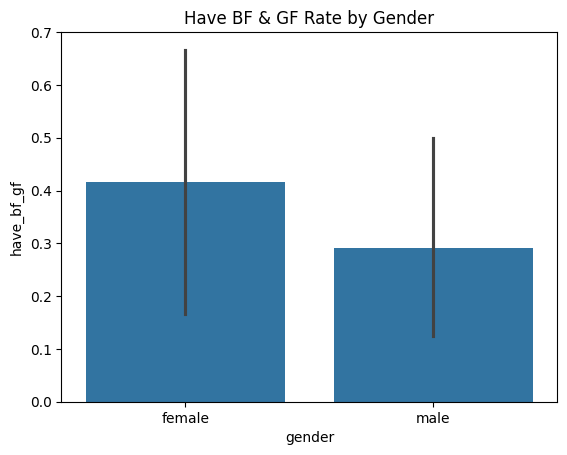

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.barplot(x='gender', y='have_bf_gf', data=df)
plt.title('Have BF & GF Rate by Gender')
plt.show()


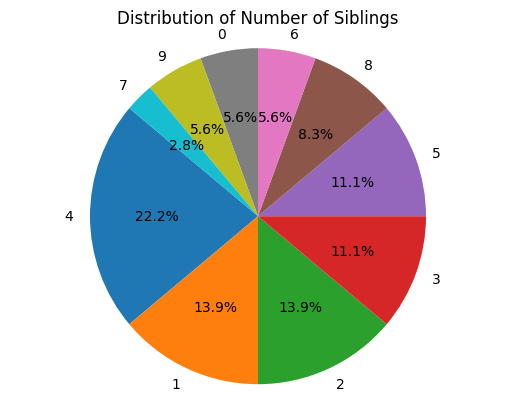

In [ ]:
# siblings
siblings_counts = df['number_siblings'].value_counts()



# Create a pie chart
# plt.figure(figsize=(9, 9))
plt.pie(siblings_counts, labels=siblings_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Number of Siblings')
plt.axis('equal')  
plt.show()

In [ ]:
print(df.columns)

Index(['number_siblings', 'name', 'gender', 'age', 'living_allowance',
       'have_bf_gf', 'profession', 'daily_meals', 'target'],
      dtype='object')


In [ ]:
mydata=pd.read_csv('crop.csv')

In [ ]:
duplicates = mydata.duplicated()

# Get the total count of duplicate rows
total_duplicates = duplicates.sum()
print(f'Total number of duplicate rows: {total_duplicates}')

# View duplicate rows
duplicate_rows = mydata[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

Total number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [ ]:
print(mydata.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


<Axes: >

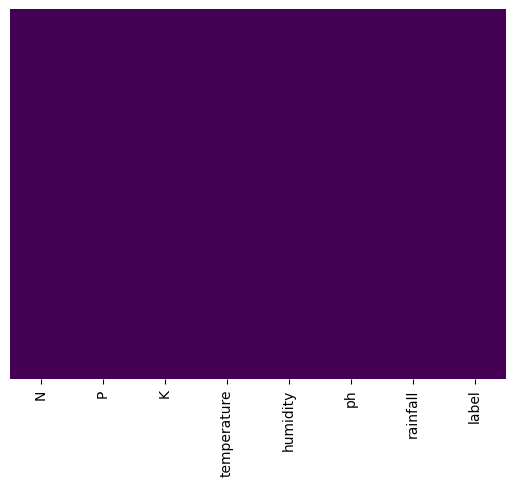

In [ ]:
sns.heatmap(mydata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

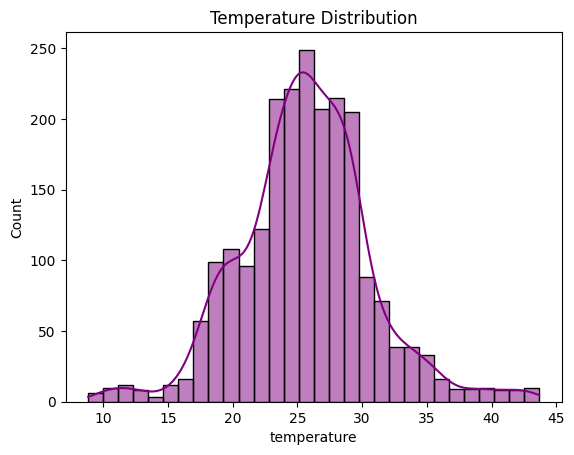

In [ ]:
sns.histplot(mydata['temperature'],color='purple',bins=30,kde=True)
plt.title('Temperature Distribution')
plt.show()

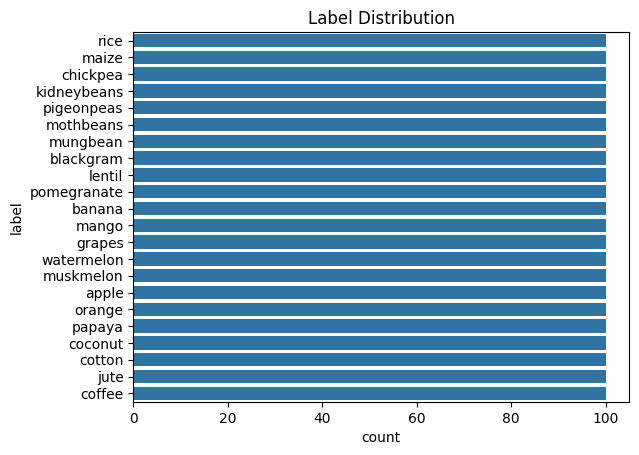

In [ ]:
sns.countplot(y='label',data=mydata)
plt.title('Label Distribution')
plt.show()

C:\Users\Ya'Becca\AppData\Local\Temp\ipykernel_8548\3636611812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label',x='ph' ,data=mydata,palette='plasma_r')


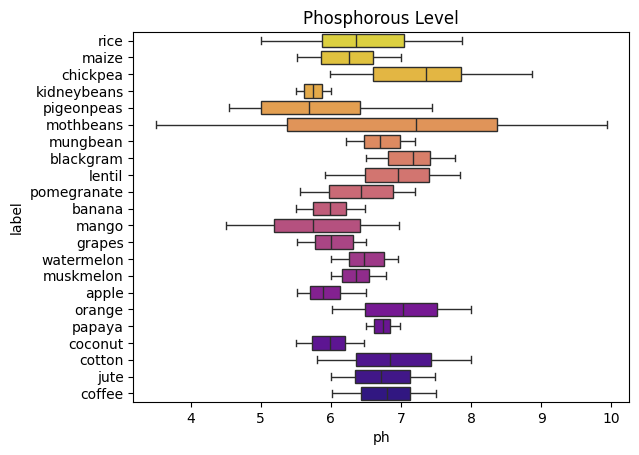

In [ ]:
sns.boxplot(y='label',x='ph' ,data=mydata,palette='plasma_r')
plt.title('Phosphorous Level')
plt.show()

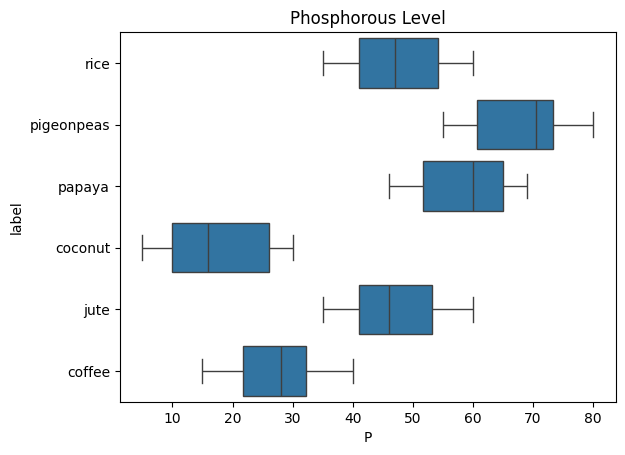

In [ ]:
sns.boxplot(y='label',x='P',data=mydata[mydata['rainfall']>150])
plt.title('Phosphorous Level')
plt.show()

In [ ]:
c=mydata.label.astype('category')
targets= dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=mydata.target
x=mydata[['N','P','K','temperature','humidity','ph','rainfall']]

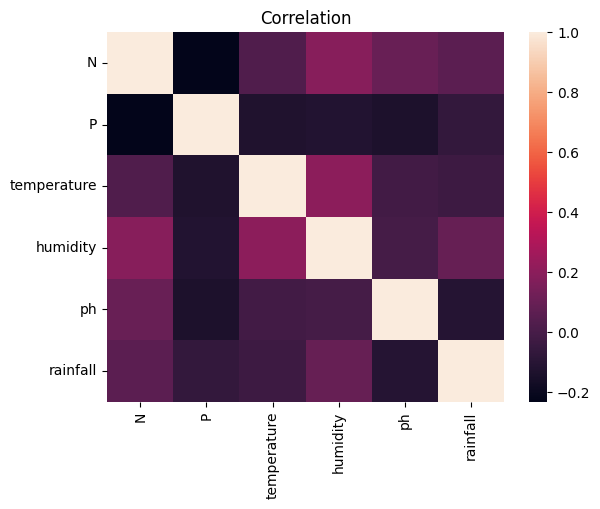

In [ ]:
# Correlation, relationship between columns
c =mydata.label.astype('category')
targets = dict(enumerate(c.cat.categories))
mydata['target'] = c.cat.codes

y = mydata.target
X = mydata[['N', 'P', 'temperature','humidity','ph','rainfall']]

sns.heatmap(X.corr())
plt.title("Correlation")
plt.show()